## Importing the necessary modules

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from operator import itemgetter
import re

Importing the data

In [153]:
cats_data = pd.read_csv("cats (2).csv")
cats_data.head()

,Unnamed: 0,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0


Dropping the column "Unnamed: 0", as it is of no significance

In [154]:
cats_data = cats_data.drop('Unnamed: 0', axis=1)

## Performing basic sanity checks and checking datatypes

In [155]:
cats_data.dtypes

age at death              float64
breed                      object
date of last vet visit     object
hair length               float64
height                    float64
number of vet visits        int64
weight                    float64
dtype: object

The date of last vet visit column is of object datatype, so we will convert it to datetime format.
Upon analysis, there was one value(2009-22-12 02:43:43) in this column which had a different date time format than others. This particular value is thus corrected first and then, datatype is changed.

In [156]:
cats_data.loc[cats_data['date of last vet visit'] == "2009-22-12 02:43:43", 'date of last vet visit'] = "2009-12-22 02:43:43"

In [157]:
cats_data['date of last vet visit'] = pd.to_datetime(cats_data['date of last vet visit'], format="%Y-%m-%d %H:%M:%S")

In [158]:
# cats_data['visit_year'] = cats_data['date of last vet visit'].dt.year
cats_data['visit_month'] = cats_data['date of last vet visit'].dt.month
cats_data['visit_week'] = cats_data['date of last vet visit'].dt.week
cats_data['visit_day'] = cats_data['date of last vet visit'].dt.day
cats_data['visit_hour'] = cats_data['date of last vet visit'].dt.hour
cats_data['visit_minute'] = cats_data['date of last vet visit'].dt.minute
cats_data['visit_dayofweek'] = cats_data['date of last vet visit'].dt.dayofweek

In [159]:
cats_data.head()

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0,8,31,2,14,2,6
1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0,11,48,27,19,8,2
2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0,1,2,12,4,39,1
3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0,11,47,24,18,51,4
4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0,7,27,3,22,17,3


I will be dropping the date of last vet visit column now, as we have already extracted much information from this feature.

In [161]:
cats_data = cats_data.drop(['date of last vet visit'], axis=1)

In [163]:
cats_data.head()

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
0,7.0,Siamese,0.883886,21.611951,5,4.0,8,31,2,14,2,6
1,9.0,Siamese,1.221535,26.451956,10,4.0,11,48,27,19,8,2
2,8.0,Manx,0.967718,18.540191,10,5.0,1,2,12,4,39,1
3,8.0,Maine Coon,1.090641,16.564362,12,7.0,11,47,24,18,51,4
4,8.0,Maine Coon,1.004712,22.535495,7,7.0,7,27,3,22,17,3


Checking for null values

In [164]:
cats_data.isnull().sum()

age at death            1
breed                   0
hair length             1
height                  0
number of vet visits    0
weight                  0
visit_month             0
visit_week              0
visit_day               0
visit_hour              0
visit_minute            0
visit_dayofweek         0
dtype: int64

Only 2 null value present, therefore dropping it

In [165]:
cats_data.dropna(inplace= True, axis = 0)

### Summary statistics

In [166]:
cats_data.describe()

,age at death,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
count,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,9.016779,3.037866e+09,20.476362,8.325503,3.933893,6.406040,25.882550,15.124161,11.503356,30.365772,2.953020
std,2.892528,5.244169e+10,5.114005,3.809180,2.019090,3.476651,15.150079,8.926261,6.899592,18.049607,1.982535
min,0.000000,6.904537e-01,5.077179,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,9.377131e-01,16.932919,6.000000,2.000000,3.000000,13.000000,8.000000,5.000000,14.000000,1.000000
50%,9.000000,1.003535e+00,20.769064,8.000000,4.000000,7.000000,27.000000,15.000000,12.000000,29.000000,3.000000
75%,11.000000,1.067898e+00,23.973393,11.000000,5.000000,9.000000,39.000000,22.750000,17.000000,48.000000,5.000000
max,18.000000,9.052840e+11,33.043014,19.000000,10.000000,12.000000,53.000000,31.000000,23.000000,59.000000,6.000000


From the above table, we can see that column "weight" has a minimum value of 0.
Let's see how many rows have weight equal to 0

In [167]:
cats_data.loc[cats_data['weight'] == 0]

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
33,6.0,Maine Coon,0.835610,16.848307,5,0.0,7,27,4,2,53,2
61,6.0,Maine Coon,0.942037,23.571271,16,0.0,2,6,6,6,49,2
102,17.0,Rex,1.086447,19.750088,9,0.0,11,48,27,7,35,1
114,11.0,Siamese,1.190255,17.747619,6,0.0,8,33,14,22,1,3
131,6.0,Rex,0.933132,20.619181,8,0.0,7,28,8,8,12,2
163,14.0,Maine Coon,1.096407,22.907829,7,0.0,4,17,28,10,14,4
174,11.0,Maine Coon,0.842447,15.286063,14,0.0,8,34,24,1,54,2
179,10.0,Manx,0.909811,24.554019,5,0.0,8,33,20,12,28,5
214,6.0,Manx,0.937148,12.019150,9,0.0,8,31,8,21,45,6
290,8.0,Javanese,1.019894,17.027594,0,0.0,5,20,16,16,33,0


There are 11 rows with weight equal to 0. It is impossible to have weight equal to 0. Without any experts present, the best way to handle this is by replacing them with the median.

In [168]:
cats_data.loc[cats_data['weight'] == 0, 'weight'] = 4

Now, let's take a look on one more abnormality which is in the column "number of vet visits". We have a minimum value of -1 in this, which is a human error.

In [169]:
cats_data.loc[cats_data['number of vet visits'] <= 0]

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
10,7.0,Javanese,0.908427,27.825613,0,2.0,1,1,3,9,14,1
57,11.0,Manx,0.868451,21.647929,-1,2.0,11,45,12,23,23,5
92,7.0,Maine Coon,0.967941,8.624444,-1,3.0,8,31,2,16,59,3
199,8.0,Rex,0.921853,22.166018,0,6.0,9,39,26,22,44,4
209,8.0,Maine Coon,1.061532,23.430280,0,3.0,7,29,14,1,22,0
275,8.0,Manx,0.968334,16.970901,0,6.0,11,44,6,3,28,6
290,8.0,Javanese,1.019894,17.027594,0,4.0,5,20,16,16,33,0
294,13.0,Javanese,1.085022,24.610927,-1,4.0,1,5,27,23,23,1


We can see here that there are 8 rows with values as 0 or -1, "number of vet visits" cannot be 0 because we have a corresponding column "date of last vet visit" which shows a value. So, there is atleast one time the cat was taken to the vet.
Therefore, replacing these values with 1 as we know there is atleast one vet visit.

In [170]:
cats_data.loc[cats_data['number of vet visits'] <= 0, 'number of vet visits'] = 1

Now, there is one more abnormality which is minimum value 0 for "age at death". We will take a look at this here.

In [171]:
cats_data.loc[cats_data['age at death'] <= 0]

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
164,0.0,Rex,0.936867,14.317804,9,1.0,7,29,20,22,28,4
288,0.0,Javanese,0.950070,24.419723,10,3.0,4,15,7,10,2,0


There are only 2 rows with age at death equal to 0. As it is a very small number, we will remove these two rows. As it seems the best way to do this.

In [172]:
cats_data = cats_data.drop(cats_data[cats_data['age at death'] <= 0].index)

There is one more abnormality noticed in hair length, where the maximum value is 9.052840e+11. This value is an outlier for sure. We will drop this one value.

In [173]:
cats_data.loc[cats_data['hair length'] > 20]

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
108,10.0,Rex,9.052840e+11,18.661543,9,2.0,12,50,10,3,48,0


In [174]:
cats_data = cats_data.drop(cats_data[cats_data['hair length'] > 20].index)

Once again, let us see the statistical description.

In [175]:
cats_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age at death,295.0,9.074576,2.809338,2.000000,7.000000,9.000000,11.000000,18.000000
hair length,295.0,1.003613,0.100263,0.690454,0.937753,1.003818,1.067127,1.238662
height,295.0,20.490023,5.121194,5.077179,16.945580,20.789497,23.945353,33.043014
number of vet visits,295.0,8.352542,3.746806,1.000000,6.000000,8.000000,11.000000,19.000000
weight,295.0,4.089153,1.876950,1.000000,3.000000,4.000000,5.000000,10.000000
visit_month,295.0,6.393220,3.476053,1.000000,3.000000,7.000000,9.000000,12.000000
visit_week,295.0,25.827119,15.147594,1.000000,12.500000,27.000000,39.000000,53.000000
visit_day,295.0,15.152542,8.949620,1.000000,8.000000,15.000000,23.000000,31.000000
visit_hour,295.0,11.501695,6.889248,0.000000,5.000000,12.000000,17.000000,23.000000
visit_minute,295.0,30.410169,18.035997,0.000000,14.000000,29.000000,48.000000,59.000000


### Boxplots

In [176]:
#Changing the outlier markers
def boxplots(val):
    red_circle = dict(markerfacecolor='red', marker='o')
    plt.boxplot(x=cats_data[val], vert=False, flierprops=red_circle);
    plt.title(val)
    plt.show()

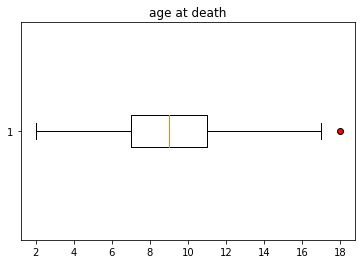

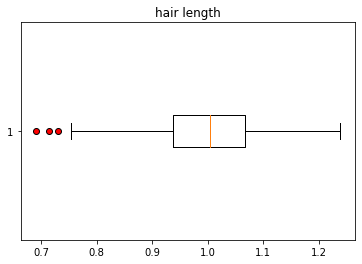

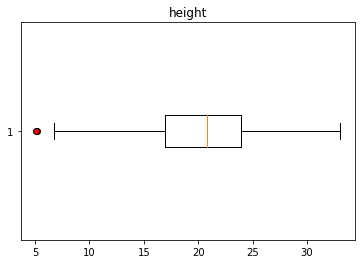

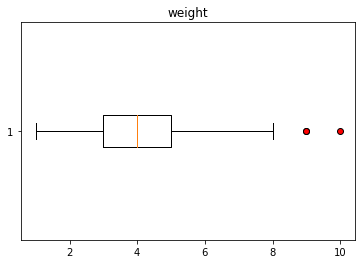

In [177]:
for column in cats_data.columns:
    if(cats_data[column].dtype == 'float64'):
        boxplots(column)

## Exploratory Data Analysis

Let's check the Correlation first

In [178]:
cats_data.corr()['age at death'].sort_values()

visit_hour             -0.073994
number of vet visits   -0.049038
height                 -0.041325
weight                 -0.036356
visit_minute            0.027253
visit_month             0.030773
visit_week              0.037151
visit_day               0.042701
hair length             0.054524
visit_dayofweek         0.056150
age at death            1.000000
Name: age at death, dtype: float64

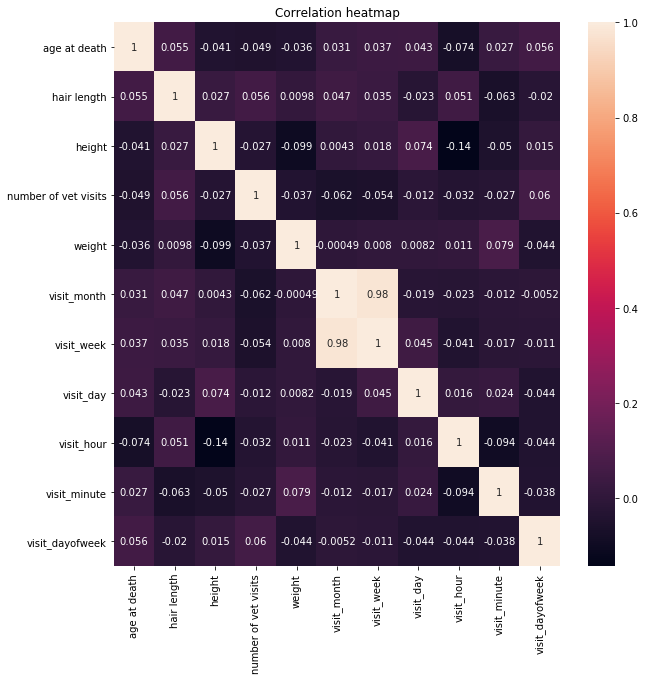

In [321]:
corr = cats_data.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)
plt.title("Correlation heatmap")
plt.show()

There is only one row with "Donald" breed. Upon searching on the internet, I did not find this breed of cat.

In [180]:
cats_data['breed'].value_counts()

Maine Coon    67
Rex           62
Manx          58
Javanese      57
Siamese       50
Donald         1
Name: breed, dtype: int64

Maine coon breed is the most in our dataset, followed by Rex, Manx, Javanese, Siamese and Donald

In [181]:
!pip install plotly

import plotly.express as px

fig = px.histogram(cats_data, x="breed", nbins=20)
fig.update_layout(title_text='Cat Breed distribution')
fig.show()

Here, we can see the median age at death is 8 or 9 except Donald which is 14 as we only have one observation for that

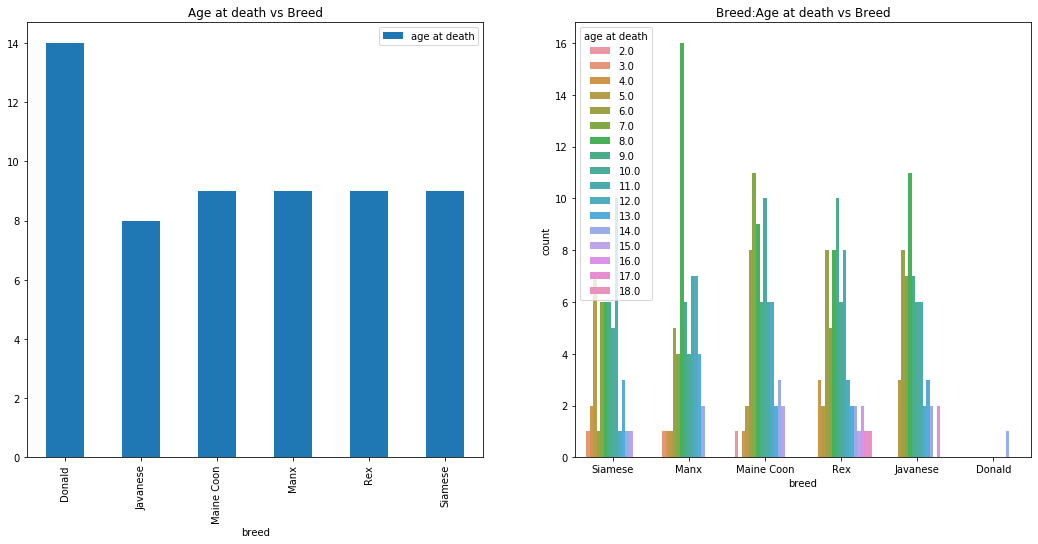

In [182]:
f,ax=plt.subplots(1,2,figsize=(18,8))
cats_data[['breed','age at death']].groupby(['breed']).median().plot.bar(ax=ax[0])
ax[0].set_title('Age at death vs Breed')
sns.countplot('breed',hue='age at death',data=cats_data,ax=ax[1])
ax[1].set_title('Breed:Age at death vs Breed')
plt.show()

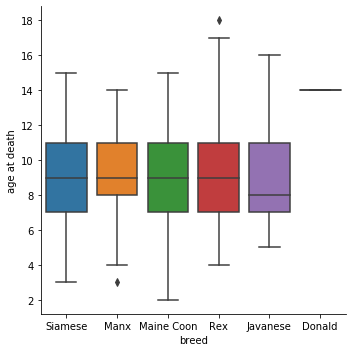

In [183]:
sns.catplot(x="breed", y="age at death", kind="box", data=cats_data)

Let us see the distribution of each feature with respect to breed.
It is observed that each distribution plot is normal. Hence, no variation needed.

In [184]:

def displotage(val):
    f= plt.figure(figsize=(12,5))
    ax=f.add_subplot(121)
    sns.distplot(cats_data[(cats_data.breed == val)]["age at death"],color='c',ax=ax)
    ax.set_title('Distribution of age at death for '+ val)
    plt.show()

def displotheight(val):
    f= plt.figure(figsize=(12,5))
    ax=f.add_subplot(121)
    sns.distplot(cats_data[(cats_data.breed == val)]["height"],color='c',ax=ax)
    ax.set_title('Distribution of height for '+ val)
    plt.show()

def displotweight(val):
    f= plt.figure(figsize=(12,5))
    ax=f.add_subplot(121)
    sns.distplot(cats_data[(cats_data.breed == val)]["weight"],color='c',ax=ax)
    ax.set_title('Distribution of age at weight for '+ val)
    plt.show()

def displothairlength(val):
    f= plt.figure(figsize=(12,5))
    ax=f.add_subplot(121)
    sns.distplot(cats_data[(cats_data.breed == val)]["hair length"],color='c',ax=ax)
    ax.set_title('Distribution of hair length for '+ val)
    plt.show()



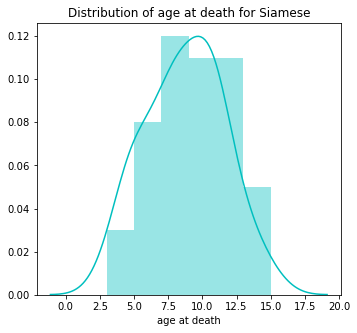

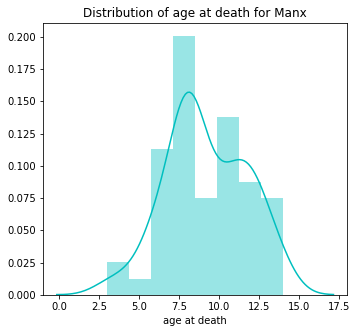

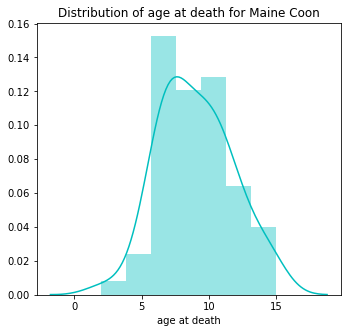

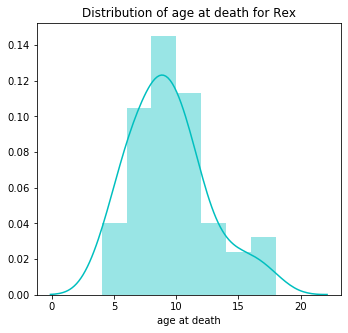

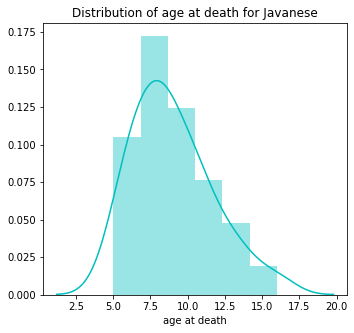

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



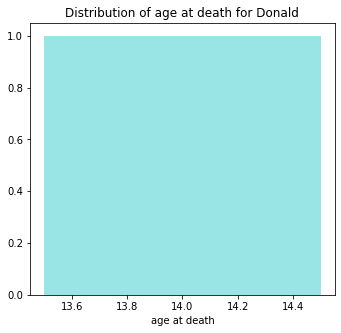

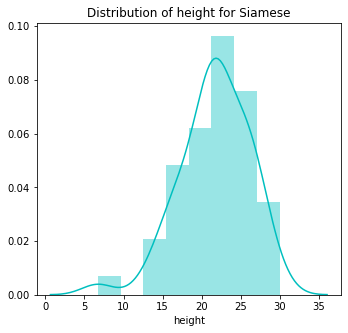

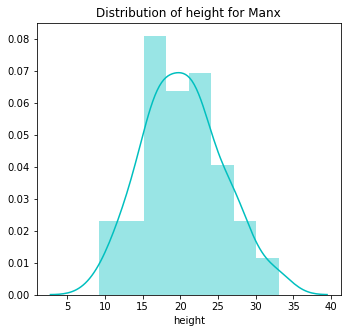

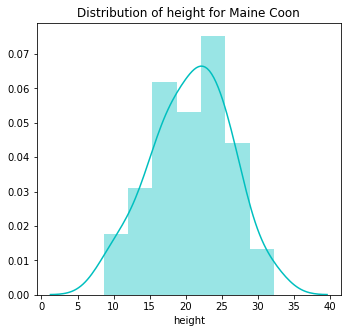

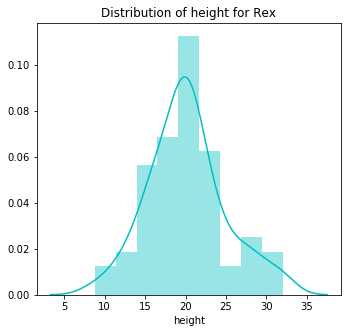

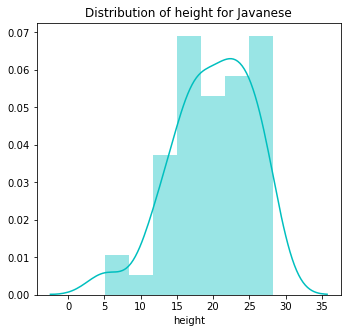

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



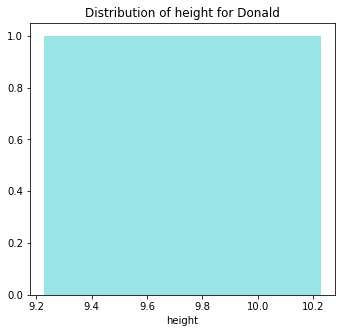

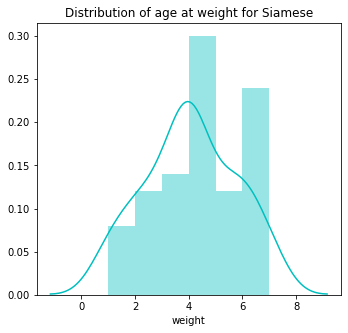

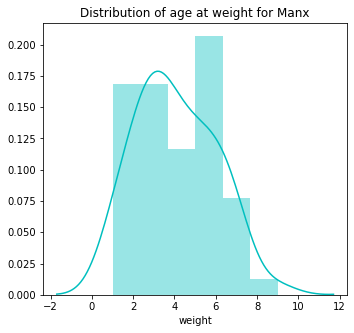

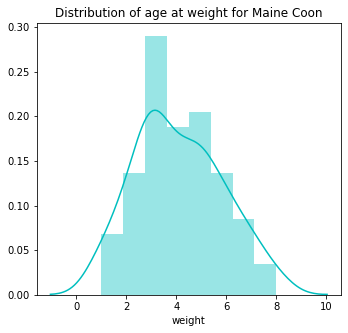

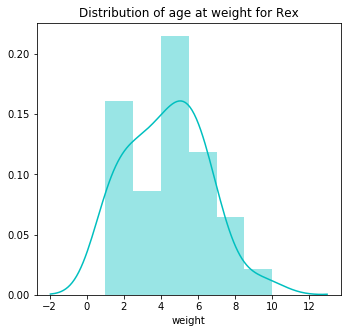

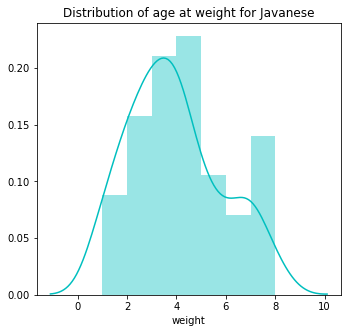

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



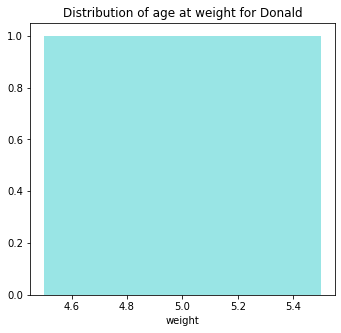

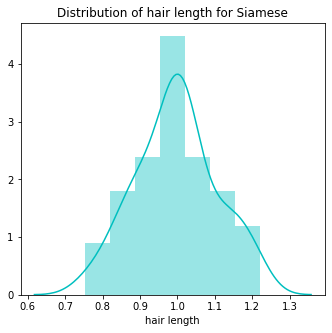

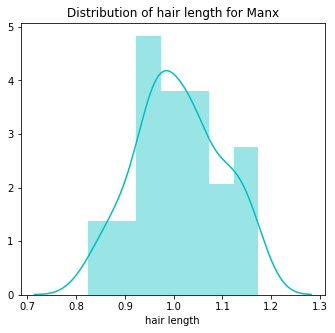

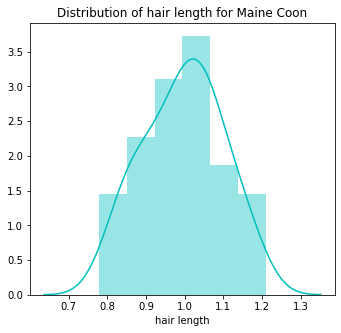

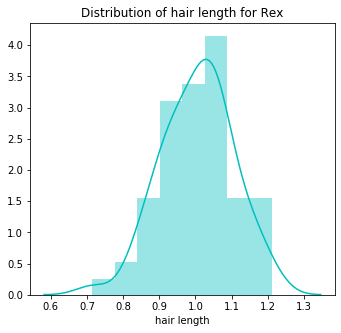

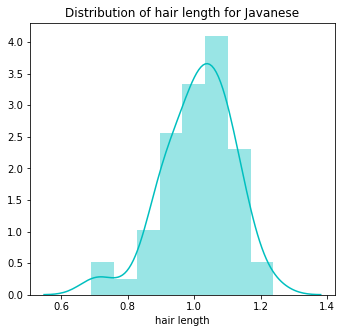

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



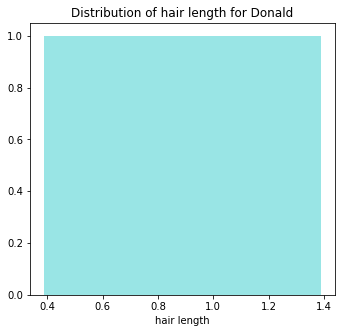

In [185]:
for val in cats_data['breed'].unique():
    displotage(val)

for val in cats_data['breed'].unique():
    displotheight(val)

for val in cats_data['breed'].unique():
    displotweight(val)

for val in cats_data['breed'].unique():
    displothairlength(val)



In [186]:
cats_data.columns

Index(['age at death', 'breed', 'hair length', 'height',
       'number of vet visits', 'weight', 'visit_month', 'visit_week',
       'visit_day', 'visit_hour', 'visit_minute', 'visit_dayofweek'],
      dtype='object')

## Data Modelling

### One hot Encoding the 'breed' variable

In [187]:
cats_data.head()

,age at death,breed,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek
0,7.0,Siamese,0.883886,21.611951,5,4.0,8,31,2,14,2,6
1,9.0,Siamese,1.221535,26.451956,10,4.0,11,48,27,19,8,2
2,8.0,Manx,0.967718,18.540191,10,5.0,1,2,12,4,39,1
3,8.0,Maine Coon,1.090641,16.564362,12,7.0,11,47,24,18,51,4
4,8.0,Maine Coon,1.004712,22.535495,7,7.0,7,27,3,22,17,3


In [188]:
#One hot encoding
#getting list of categorical features
temp_columns = cats_data.columns[cats_data.dtypes == object].tolist()
cats_data_filtered = cats_data.copy()
# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for column in temp_columns:
    n = len(cats_data[column].unique())
    if (n == 2):
        cats_data_filtered[column] = pd.get_dummies(cats_data[column], drop_first=True)
# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
cats_data_filtered = pd.get_dummies(cats_data_filtered, prefix=['breed'])

In [189]:
# from sklearn.preprocessing import LabelEncoder

# le1 = LabelEncoder()

# cats_data.insert(2,'breed_en',le1.fit_transform(cats_data['breed']))
# cats_data_filtered = cats_data.drop('breed', axis=1)

In [190]:
cats_data_filtered.head()

,age at death,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek,breed_Donald,breed_Javanese,breed_Maine Coon,breed_Manx,breed_Rex,breed_Siamese
0,7.0,0.883886,21.611951,5,4.0,8,31,2,14,2,6,0,0,0,0,0,1
1,9.0,1.221535,26.451956,10,4.0,11,48,27,19,8,2,0,0,0,0,0,1
2,8.0,0.967718,18.540191,10,5.0,1,2,12,4,39,1,0,0,0,1,0,0
3,8.0,1.090641,16.564362,12,7.0,11,47,24,18,51,4,0,0,1,0,0,0
4,8.0,1.004712,22.535495,7,7.0,7,27,3,22,17,3,0,0,1,0,0,0


In [191]:
cats_data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
age at death,295.0,9.074576,2.809338,2.000000,7.000000,9.000000,11.000000,18.000000
hair length,295.0,1.003613,0.100263,0.690454,0.937753,1.003818,1.067127,1.238662
height,295.0,20.490023,5.121194,5.077179,16.945580,20.789497,23.945353,33.043014
number of vet visits,295.0,8.352542,3.746806,1.000000,6.000000,8.000000,11.000000,19.000000
weight,295.0,4.089153,1.876950,1.000000,3.000000,4.000000,5.000000,10.000000
visit_month,295.0,6.393220,3.476053,1.000000,3.000000,7.000000,9.000000,12.000000
visit_week,295.0,25.827119,15.147594,1.000000,12.500000,27.000000,39.000000,53.000000
visit_day,295.0,15.152542,8.949620,1.000000,8.000000,15.000000,23.000000,31.000000
visit_hour,295.0,11.501695,6.889248,0.000000,5.000000,12.000000,17.000000,23.000000
visit_minute,295.0,30.410169,18.035997,0.000000,14.000000,29.000000,48.000000,59.000000


In [192]:
cats_data_filtered.shape

(295, 17)

### Feature Selection

Splitting dataset into train, validation and test datasets.
5% data is kept for testing, 20% for validation and the rest for training.

In [193]:
train_data, test_data = train_test_split(cats_data_filtered, test_size = 0.05, random_state = 21)
train_data, val_data = train_test_split(train_data, test_size = 0.20, random_state = 21)

In [194]:
X_train = train_data.drop(['age at death'],axis=1)
y_train = train_data["age at death"]

X_val = val_data.drop(['age at death'],axis=1)
y_val = val_data["age at death"]

X_test = test_data.drop(['age at death'],axis=1)
y_test = test_data["age at death"]


In [195]:
print("X train shape",X_train.shape)
print("Y train shape",y_train.shape)
print("X validation shape",X_val.shape)
print("Y validation shape",y_val.shape)
print("X Test shape",X_test.shape)
print("Y Test shape",y_test.shape)

X train shape (224, 16)
Y train shape (224,)
X validation shape (56, 16)
Y validation shape (56,)
X Test shape (15, 16)
Y Test shape (15,)


In [196]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

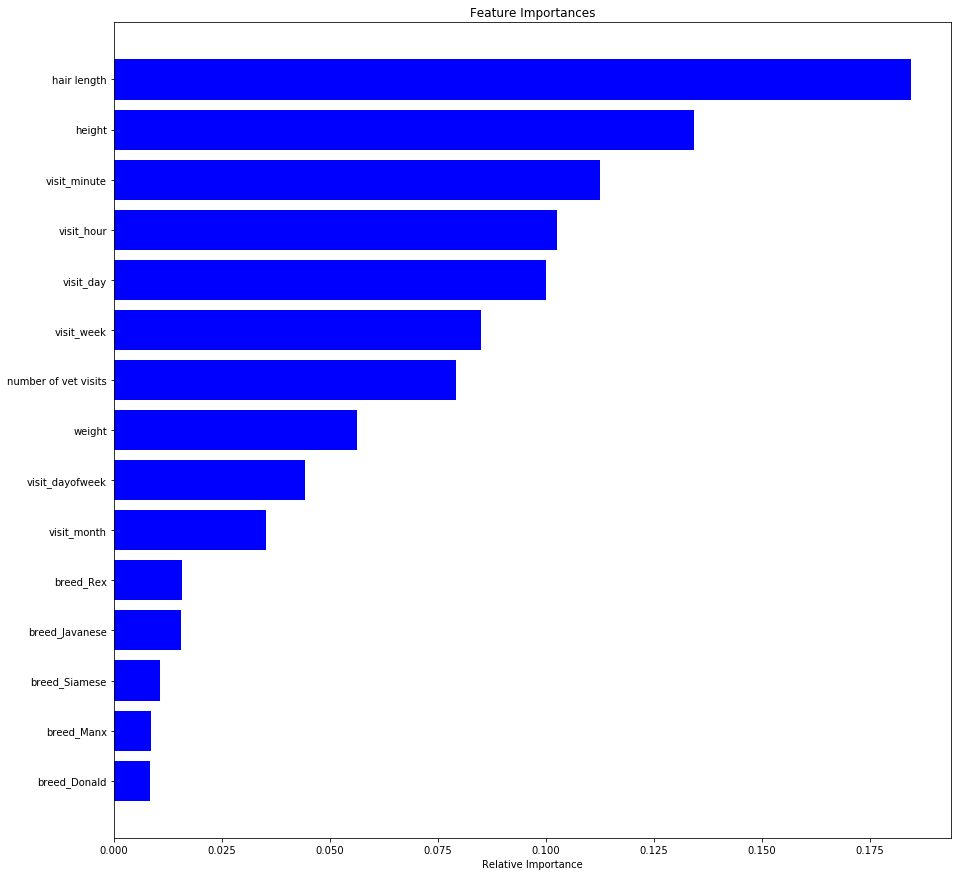

In [197]:
features = list(X_train.columns)
importances = rf.feature_importances_
indices15 = np.argsort(importances)[-15:]
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices15)), importances[indices15], color='b', align='center')
plt.yticks(range(len(indices15)), [features[i] for i in indices15])
plt.xlabel('Relative Importance')
plt.show()

Defining the some useful functions

In [198]:
def actualvpre(true_value, predicted_value):
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True values', fontsize=15)
    plt.ylabel('Predicted values', fontsize=15)
    plt.axis('equal')
    plt.show()

## Linear Regression

Scaling for Linear Regression

In [199]:
column_names = list(X_val)
mm_scaler = preprocessing.MinMaxScaler()
X_val_linear= mm_scaler.fit_transform(X_val)
X_val_linear = pd.DataFrame(X_val_linear, columns=column_names)   
X_val_linear.describe().T

,count,mean,std,min,25%,50%,75%,max
hair length,56.0,0.496035,0.251240,0.0,0.321171,0.530315,0.673027,1.0
height,56.0,0.542737,0.203490,0.0,0.432138,0.549374,0.662715,1.0
number of vet visits,56.0,0.428571,0.224544,0.0,0.235294,0.411765,0.588235,1.0
weight,56.0,0.410714,0.254186,0.0,0.285714,0.428571,0.571429,1.0
visit_month,56.0,0.503247,0.295706,0.0,0.272727,0.545455,0.727273,1.0
visit_week,56.0,0.516764,0.290214,0.0,0.301020,0.540816,0.739796,1.0
visit_day,56.0,0.407143,0.280167,0.0,0.158333,0.400000,0.583333,1.0
visit_hour,56.0,0.478896,0.307307,0.0,0.215909,0.454545,0.727273,1.0
visit_minute,56.0,0.532581,0.316169,0.0,0.228070,0.508772,0.859649,1.0
visit_dayofweek,56.0,0.464286,0.338914,0.0,0.166667,0.500000,0.833333,1.0


In [200]:
column_names = list(X_train)
mm_scaler = preprocessing.MinMaxScaler()
X_linear= mm_scaler.fit_transform(X_train)
X_linear = pd.DataFrame(X_linear, columns=column_names)   
X_linear.describe().T

,count,mean,std,min,25%,50%,75%,max
hair length,224.0,0.551225,0.189257,0.0,0.422763,0.552467,0.671017,1.0
height,224.0,0.532297,0.191082,0.0,0.388953,0.538159,0.680133,1.0
number of vet visits,224.0,0.407738,0.206876,0.0,0.277778,0.388889,0.555556,1.0
weight,224.0,0.345387,0.212473,0.0,0.222222,0.333333,0.555556,1.0
visit_month,224.0,0.497159,0.321313,0.0,0.181818,0.545455,0.727273,1.0
visit_week,224.0,0.484461,0.296423,0.0,0.225962,0.500000,0.730769,1.0
visit_day,224.0,0.492113,0.302510,0.0,0.233333,0.466667,0.766667,1.0
visit_hour,224.0,0.509511,0.301497,0.0,0.260870,0.521739,0.782609,1.0
visit_minute,224.0,0.504162,0.303515,0.0,0.237288,0.483051,0.779661,1.0
visit_dayofweek,224.0,0.497024,0.325760,0.0,0.166667,0.500000,0.833333,1.0


In [201]:
X_linear.head()

,hair length,height,number of vet visits,weight,visit_month,visit_week,visit_day,visit_hour,visit_minute,visit_dayofweek,breed_Donald,breed_Javanese,breed_Maine Coon,breed_Manx,breed_Rex,breed_Siamese
0,0.517583,0.682363,0.555556,0.555556,0.181818,0.230769,0.800000,0.521739,0.237288,0.500000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.897757,0.786896,0.333333,0.333333,0.909091,0.865385,0.333333,0.826087,0.508475,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
2,0.218931,0.500077,0.555556,0.000000,0.454545,0.442308,0.633333,0.739130,0.661017,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
3,0.817088,0.588353,0.777778,0.111111,0.727273,0.711538,0.566667,0.304348,0.169492,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.570288,0.805330,0.166667,0.222222,0.545455,0.557692,0.866667,0.695652,0.152542,0.666667,0.0,0.0,0.0,1.0,0.0,0.0


In [202]:
# Create model
reg = LinearRegression()
fit = reg.fit(X_linear, y_train)

predicted = reg.predict(X_val_linear)

In [203]:
print(reg.score(X_linear,y_train))
print(reg.score(X_val_linear,y_val))

0.04371022029886229
-0.03770780048491651


In [204]:
predicted

array([8.70255734, 8.74833663, 9.80152277, 7.73831829, 9.21687737,
       9.09009593, 8.97846914, 9.12931181, 9.91024205, 8.91933278,
       9.74254456, 9.2368422 , 8.66948413, 8.77702274, 9.06593966,
       9.04743374, 8.84343656, 8.85793164, 8.94897616, 7.96134875,
       9.15763433, 8.65447651, 9.71073821, 8.38360664, 8.65581412,
       8.45958989, 9.53935109, 8.93874453, 9.4071292 , 8.07944738,
       8.36676709, 9.69898508, 9.73443048, 9.6046946 , 9.55630594,
       9.61537572, 9.42850073, 8.81913204, 8.76958257, 8.95223227,
       8.16971915, 9.38599002, 7.78833071, 9.73831765, 8.16016181,
       8.59026077, 7.51806601, 9.51551558, 7.3213073 , 8.48653253,
       8.77789803, 8.45077822, 8.89280214, 9.87405168, 9.57972578,
       9.0376558 ])

In [205]:
# Mean Squared Error, Root mean squared error and Root Mean Squared Error:
test_mse = mean_squared_error(y_val, predicted)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predicted)

print(f'the test MSE is: {test_mse}')
print(f'the test RMSE is: {test_rmse}')
print(f'the test MAE is: {test_mae}')

the test MSE is: 6.919816812417275
the test RMSE is: 2.6305544686277216
the test MAE is: 2.19969488101163


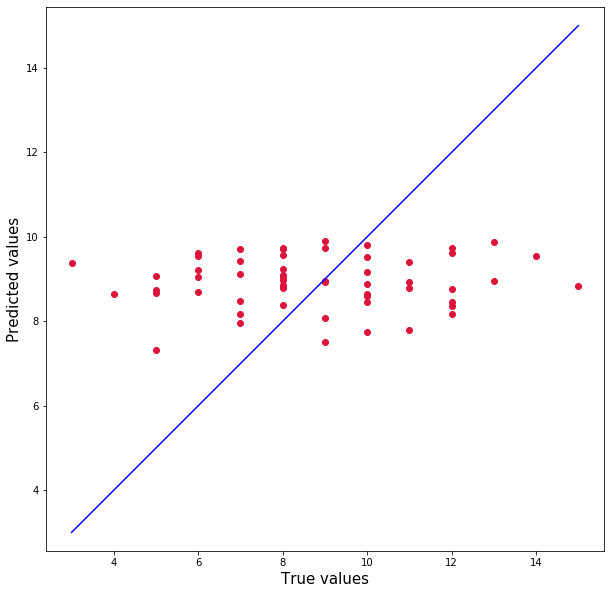

In [206]:
actualvpre(y_val, predicted)

Embedding the results to a dataframe

In [207]:
end_result = pd.DataFrame({'Algo': ['Linear Regression'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

## Polynomial L R

In [224]:
poly = PolynomialFeatures(degree=4)

# Transforming the input data
x_poly = poly.fit_transform(X_linear)

In [225]:
x_poly.shape

(224, 4845)

In [226]:
reg = LinearRegression()
reg.fit(x_poly, y_train)
x_val_poly = poly.fit_transform(X_val_linear)
predict_poly = reg.predict(x_val_poly)

In [228]:
predict_poly

array([14.6600645 , 11.0140952 , 13.12241298, 16.19202534,  9.11424153,
       13.07639888, 12.9016339 ,  8.62931163,  3.92933461,  9.97528254,
        7.99627118, 16.44813368,  7.01272254,  9.25985335, 16.29956635,
       15.4914649 ,  9.84960035,  4.22983915, -2.90745676,  8.20761044,
       14.77471029,  5.15648037, 10.35269333, 10.90331456,  7.36525089,
       18.64582244, 17.67941664,  1.2502048 ,  8.38761156,  3.55110747,
        2.58770449,  6.92593615, 12.42795404, 14.71811878, 12.52492768,
        6.86500886,  8.14800649, 10.78415829, 19.63695941, 13.59424708,
        5.87921783, 14.24316563, 13.82512601,  7.43966546, -1.69231301,
        2.65137385, -0.28728961, 15.11060637, -2.00640668,  7.38323143,
        5.68764956,  7.73059738, 13.29253071, 13.86478518, 11.50638052,
       10.15964214])

In [229]:
test_mse = mean_squared_error(y_val, predict_poly)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predict_poly)

print(f'the test MSE is: {test_mse}')
print(f'the test RMSE is: {test_rmse}')
print(f'the test MAE is: {test_mae}')

the test MSE is: 34.11159776498436
the test RMSE is: 5.8405134847018685
the test MAE is: 4.66757767786036


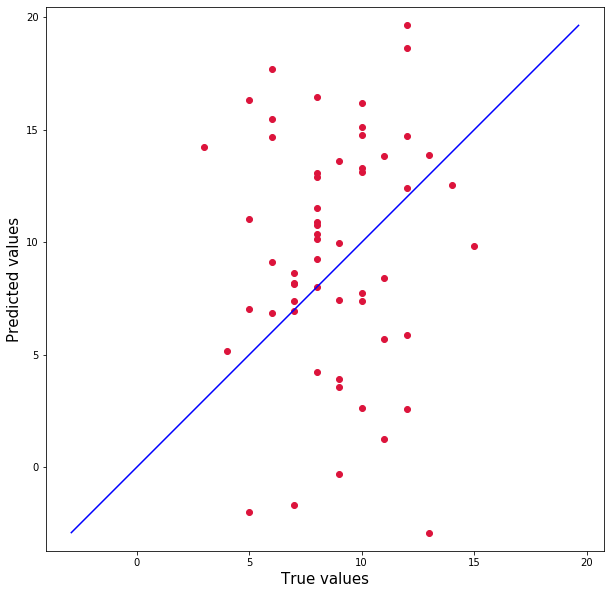

In [230]:
actualvpre(y_val, predict_poly)

Embedding results to the dataframe

In [231]:
temp = pd.DataFrame({'Algo': ['Polynomial Degree 4'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## Applying Lasso Regularization

In [234]:
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_linear, y_train)
predict_lasso = lasso_reg.predict(X_val_linear)

In [235]:

test_mse = mean_squared_error(y_val, predict_lasso)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predict_lasso)

print(f'the test MSE is: {test_mse}')
print(f'the test RMSE is: {test_rmse}')
print(f'the test MAE is: {test_mae}')

the test MSE is: 6.795918367346938
the test RMSE is: 2.6068982272706656
the test MAE is: 2.137755102040816


In [242]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1 ,1, 10]
param_grid = dict(alpha=alpha)
lasso_grid = GridSearchCV(lasso_reg, param_grid=param_grid, scoring='neg_mean_squared_error')
print('------------')

lasso_grid.fit(X_linear, y_train)
lasso_pred = lasso_grid.best_estimator_.predict(X_val_linear)
print('Best Score: ', lasso_grid_result.best_score_)
print('Best Params: ', lasso_grid_result.best_params_)

------------
Best Score:  -8.02347376199497
Best Params:  {'alpha': 1}


In [243]:
test_mse = mean_squared_error(y_val, lasso_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, lasso_pred)

print("Mean Squared error: ", mean_squared_error(y_val, lasso_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, lasso_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, lasso_pred))

Mean Squared error:  6.795918367346938
Root Mean Squared error:  2.6068982272706656
Mean Absolute error:  2.137755102040816


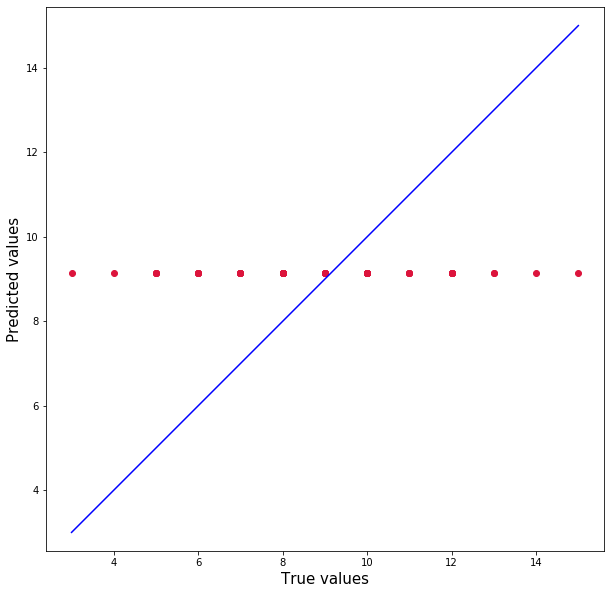

In [238]:
actualvpre(y_val, lasso_pred)

In [239]:
temp = pd.DataFrame({'Algo': ['Lasso regression Tuned'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## Ridge Regularization

In [240]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_linear, y_train)
predict_ridge = ridge_reg.predict(X_val_linear)

In [241]:

test_mse = mean_squared_error(y_val, predict_ridge)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predict_ridge)

print(f'the test MSE is: {test_mse}')
print(f'the test RMSE is: {test_rmse}')
print(f'the test MAE is: {test_mae}')

the test MSE is: 6.7724651785448104
the test RMSE is: 2.602396045674987
the test MAE is: 2.1388744007217233


In [244]:
alpha = [1,5,10,80,100,500,1000,10000]
param_grid = dict(alpha=alpha)
ridge_grid = GridSearchCV(ridge_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
ridge_grid.fit(X_linear, y_train)
ridge_pred = ridge_grid.best_estimator_.predict(X_val_linear)
print('Best Score: ', ridge_grid.best_score_)
print('Best Params: ', ridge_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  -8.024567195090569
Best Params:  {'alpha': 10000}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.4s finished


In [245]:
test_mse = mean_squared_error(y_val, ridge_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, ridge_pred)

print("Mean Squared error: ", mean_squared_error(y_val, ridge_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, ridge_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, ridge_pred))

Mean Squared error:  6.795650753206068
Root Mean Squared error:  2.606846898689309
Mean Absolute error:  2.1377177671305914


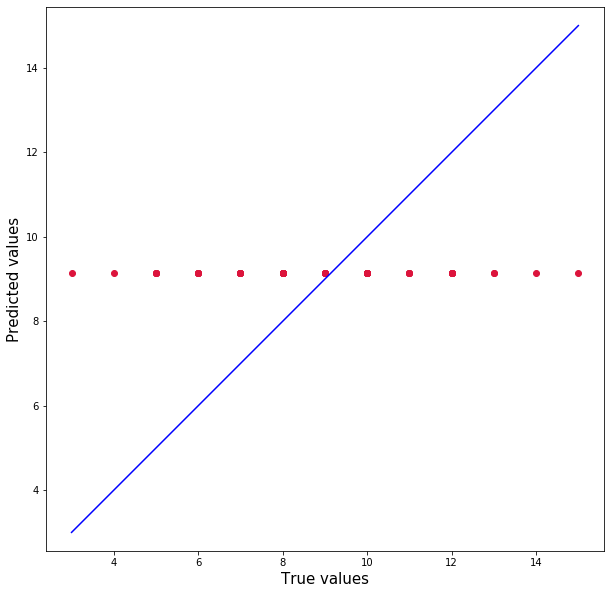

In [246]:
actualvpre(y_val, ridge_pred)

In [247]:
temp = pd.DataFrame({'Algo': ['Ridge regression Tuned'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## Lasso with Polynomial degree 4

In [248]:
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_poly, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [249]:
# find optimal alpha with grid search
alpha = [0.00001,0.0001, 0.0005, 0.0008, 0.001, 0.01, 0.1, 1, 5, 10]
param_grid = dict(alpha=alpha)
lassopoly_grid = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
lassopoly_grid.fit(X_linear, y_train)
lassopoly_pred = lassopoly_grid.best_estimator_.predict(X_val_linear)
print('Best Score: ', lassopoly_grid.best_score_)
print('Best Params: ', lassopoly_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  -8.02347376199497
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [250]:
test_mse = mean_squared_error(y_val, lassopoly_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, lassopoly_pred)

print("Mean Squared error: ", mean_squared_error(y_val, lassopoly_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, lassopoly_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, lassopoly_pred))

Mean Squared error:  6.795918367346938
Root Mean Squared error:  2.6068982272706656
Mean Absolute error:  2.137755102040816


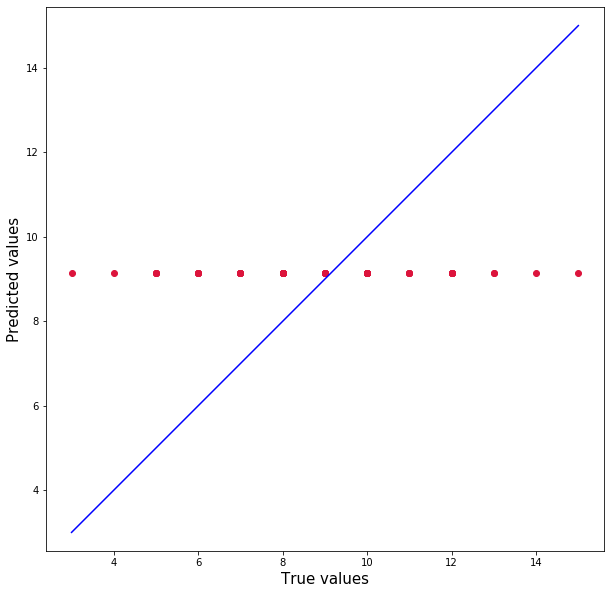

In [251]:
actualvpre(y_val, lassopoly_pred)

In [252]:
temp = pd.DataFrame({'Algo': ['Lasso Polynomial regression'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## Ridge with Polynomial degree 5

In [253]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_poly, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [254]:
ridge_reg = Ridge()
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
param_grid = dict(alpha=alpha)
ridgepoly_grid = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
ridgepoly_grid.fit(x_poly, y_train)
ridgepoly_pred = ridgepoly_grid.best_estimator_.predict(poly.fit_transform(X_val_linear))
print('Best Score: ', ridgepoly_grid.best_score_)
print('Best Params: ', ridgepoly_grid.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.8s finished


Best Score:  -10.553810986170195
Best Params:  {'alpha': 10}


In [255]:
test_mse = mean_squared_error(y_val, ridgepoly_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, ridgepoly_pred)

print("Mean Squared error: ", mean_squared_error(y_val, ridgepoly_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, ridgepoly_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, ridgepoly_pred))

Mean Squared error:  9.074003058499775
Root Mean Squared error:  3.0123085928403444
Mean Absolute error:  2.331227697467007


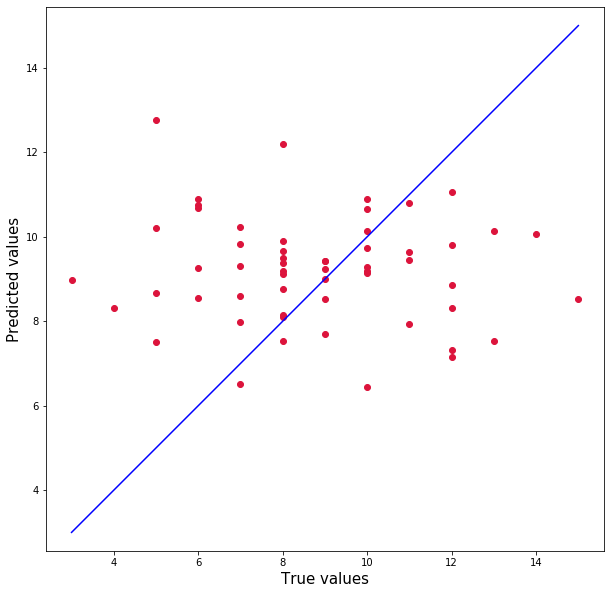

In [256]:
actualvpre(y_val, ridgepoly_pred)

In [257]:
temp = pd.DataFrame({'Algo': ['Ridge Polynomial regression'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## Random Forest Regressor

Random Forest with default parameters

In [258]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [259]:
predict_rf = random_forest.predict(X_val)

In [260]:
test_mse = mean_squared_error(y_val, predict_rf)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predict_rf)

print("Mean Squared error: ", mean_squared_error(y_val, predict_rf))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, predict_rf)))
print("Mean Absolute error: ", mean_absolute_error(y_val, predict_rf))

Mean Squared error:  6.957587500000001
Root Mean Squared error:  2.6377239241436925
Mean Absolute error:  2.12875


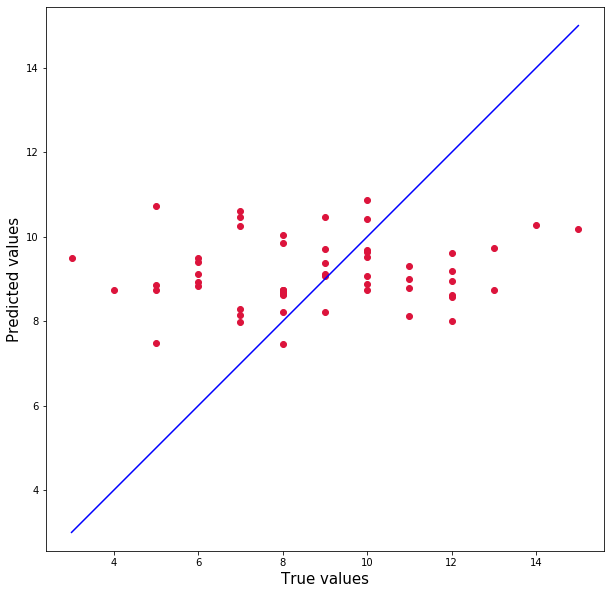

In [261]:
actualvpre(y_val, predict_rf)

In [262]:
temp = pd.DataFrame({'Algo': ['Random Forest regression with default parameters'],
                    'MSE': [test_mse],
                    'RMSE': [test_rmse],
                    'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

In [264]:
random_forest_grid = RandomForestRegressor()
n_estimators = [100,250,500]
max_features = ['sqrt', 'log2']
max_depth = [5,10,15,20]
min_samples_leaf = [1,5,10,15,20]
min_samples_split = [5,10,15,20]

param_grid = dict(n_estimators=n_estimators , max_features = max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
rf_grid = GridSearchCV(estimator=random_forest_grid, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print('Best Score: ', rf_grid.best_score_)
print('Best Params: ', rf_grid.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 18.4min finished


Best Score:  -7.972301096334194
Best Params:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 100}


In [266]:
rf_pred = rf_grid.best_estimator_.predict(X_val)

In [267]:
test_mse = mean_squared_error(y_val, rf_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, rf_pred)

print("Mean Squared error: ", mean_squared_error(y_val, rf_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, rf_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, rf_pred))

Mean Squared error:  6.788162577972644
Root Mean Squared error:  2.6054102513755186
Mean Absolute error:  2.121944616421023


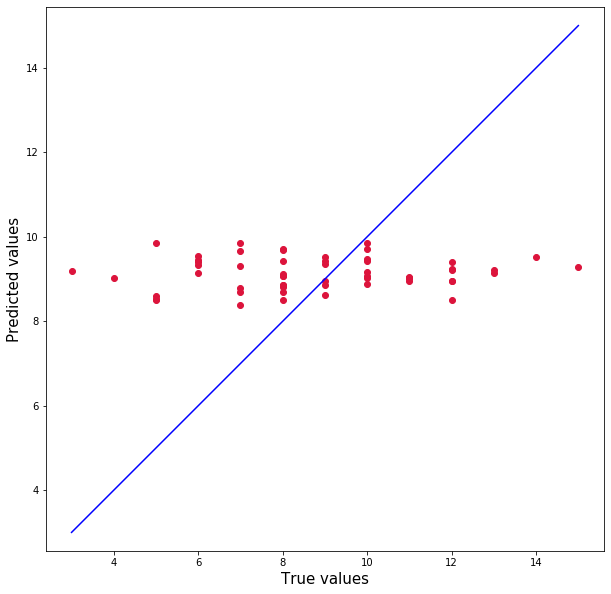

In [268]:
actualvpre(y_val, rf_pred)

In [269]:
temp = pd.DataFrame({'Algo': ['Random Forest regression with tuned parameters'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

### Gradient Boost

In [270]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [271]:
predict_gb = gradient_boost.predict(X_val)

In [272]:

test_mse = mean_squared_error(y_val, predict_gb)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, predict_gb)

print("Mean Squared error: ", mean_squared_error(y_val, predict_gb))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, predict_gb)))
print("Mean Absolute error: ", mean_absolute_error(y_val, predict_gb))

Mean Squared error:  8.101697057140933
Root Mean Squared error:  2.846348021086131
Mean Absolute error:  2.26906165555387


In [273]:
temp = pd.DataFrame({'Algo': ['Gradient Boost regression with default parameters'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

In [274]:
gradient_boost = GradientBoostingRegressor()
loss = ['ls', 'lad', 'huber', 'quantile']
learning_rate = [0.01,0.1,1]
n_estimators = [100,200]
max_features = ['sqrt', 'log2']

param_grid = dict(loss = loss ,learning_rate = learning_rate, n_estimators=n_estimators , max_features = max_features)
gb_grid = GridSearchCV(estimator=gradient_boost, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gb_grid.fit(X_train, y_train)
gb_pred = gb_grid.predict(X_val)
print('Best Score: ', gb_grid.best_score_)
print('Best Params: ', gb_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   38.1s finished


Best Score:  -7.940283655654317
Best Params:  {'learning_rate': 0.01, 'loss': 'huber', 'max_features': 'log2', 'n_estimators': 100}


In [275]:

test_mse = mean_squared_error(y_val, gb_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, gb_pred)

print("Mean Squared error: ", mean_squared_error(y_val, gb_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, gb_pred)))
print("Mean Absolute error: ", mean_absolute_error(y_val, gb_pred))

Mean Squared error:  6.8012138279889545
Root Mean Squared error:  2.607913692588187
Mean Absolute error:  2.122215617994492


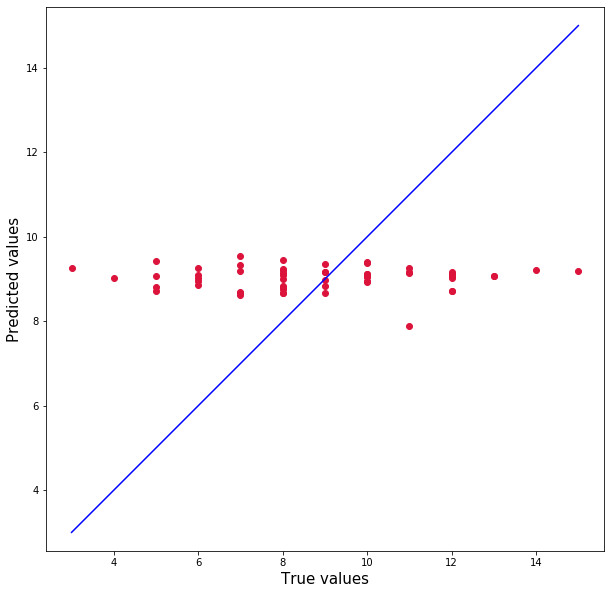

In [276]:
actualvpre(y_val, gb_pred)

In [277]:
temp = pd.DataFrame({'Algo': ['Gradient Boost Tuned regression'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

## XG Boost Regressor

In [278]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()

In [279]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [280]:
xg_pre = xg_model.predict(X_val)

In [281]:

test_mse = mean_squared_error(y_val, xg_pre)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, xg_pre)

print("Mean Squared error: ", mean_squared_error(y_val, xg_pre))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, xg_pre)))
print("Mean Absolute error: ", mean_absolute_error(y_val, xg_pre))

Mean Squared error:  9.4414874757793
Root Mean Squared error:  3.072700355677283
Mean Absolute error:  2.4568209052085876


In [282]:
temp = pd.DataFrame({'Algo': ['XG Boost regression with default parameters'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

In [283]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [285]:
grid_xg = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [286]:
grid_xg.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   17.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   49.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_job...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             iid='deprecated', n_jobs=10,
    

In [287]:
grid_xg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [288]:
xg_preds = grid_xg.best_estimator_.predict(X_val)

In [289]:
test_mse = mean_squared_error(y_val, xg_preds)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_val, xg_preds)

print("Mean Squared error: ", mean_squared_error(y_val, xg_preds))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_val, xg_preds)))
print("Mean Absolute error: ", mean_absolute_error(y_val, xg_preds))

Mean Squared error:  6.482498990415199
Root Mean Squared error:  2.5460752130318536
Mean Absolute error:  2.0375217625073025


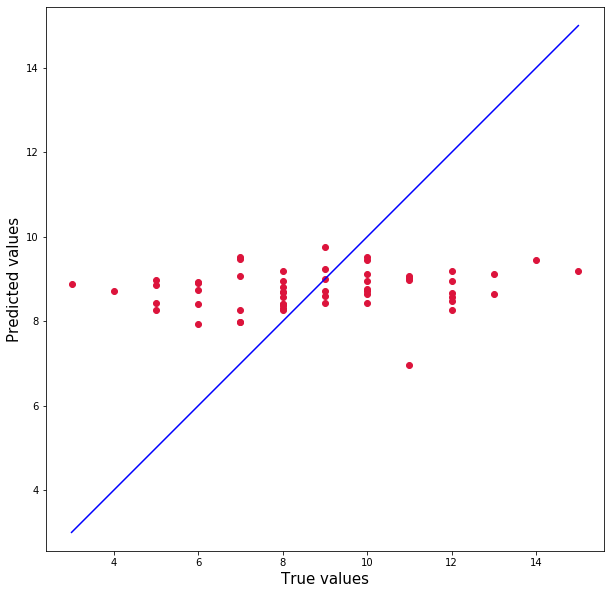

In [290]:
actualvpre(y_val,xg_preds)

In [291]:
temp = pd.DataFrame({'Algo': ['XG Boost tuned regression'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

end_result = end_result.append(temp, ignore_index=True)

In [292]:
end_result

,Algo,MSE,RMSE,MAE
0,Linear Regression,6.919817,2.630554,2.199695
1,Polynomial Degree 2,409.748884,20.242255,16.316964
2,Polynomial Degree 3,46.889802,6.847613,5.390940
3,Polynomial Degree 4,34.111598,5.840513,4.667578
4,Lasso regression Tuned,6.795918,2.606898,2.137755
5,Ridge regression Tuned,6.795651,2.606847,2.137718
6,Lasso Polynomial regression,6.795918,2.606898,2.137755
7,Ridge Polynomial regression,9.074003,3.012309,2.331228
8,Random Forest regression with default parameters,6.957588,2.637724,2.128750
9,Random Forest regression with tuned parameters,6.788163,2.605410,2.121945


### Unseen data Evaluation

XGBoost

In [307]:
xg_unseen = grid_xg.best_estimator_.predict(X_test)

In [308]:
test_mse = mean_squared_error(y_test, xg_unseen)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, xg_unseen)

print("Mean Squared error: ", mean_squared_error(y_test, xg_unseen))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, xg_unseen)))
print("Mean Absolute error: ", mean_absolute_error(y_test, xg_unseen))

Mean Squared error:  11.062136905253828
Root Mean Squared error:  3.3259790897198718
Mean Absolute error:  2.818842379252116


In [309]:
unseen_result = pd.DataFrame({'Algo': ['XG Boost'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})


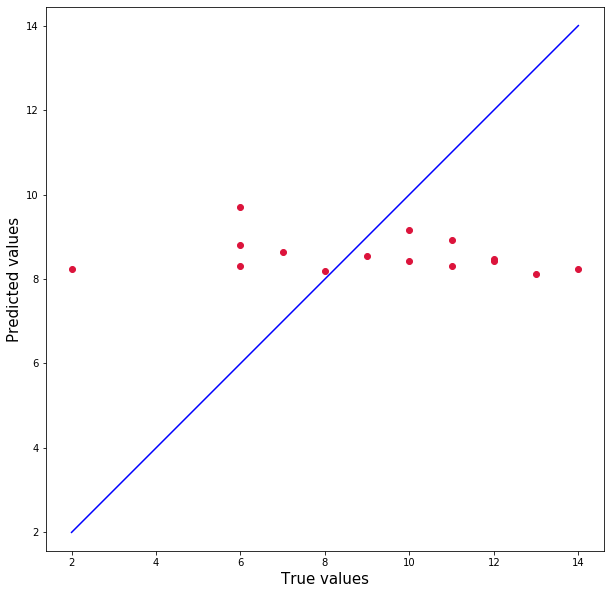

In [310]:
actualvpre(y_test, xg_unseen)

Gradient Boost

In [311]:
gb_unseen = gb_grid.best_estimator_.predict(X_test)

In [312]:
test_mse = mean_squared_error(y_test, gb_unseen)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, gb_unseen)

print("Mean Squared error: ", mean_squared_error(y_test, gb_unseen))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, gb_unseen)))
print("Mean Absolute error: ", mean_absolute_error(y_test, gb_unseen))

Mean Squared error:  10.379991796547463
Root Mean Squared error:  3.221799465601089
Mean Absolute error:  2.7472655058110265


In [313]:
temp = pd.DataFrame({'Algo': ['Gradient Boost'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

unseen_result = unseen_result.append(temp, ignore_index=True)

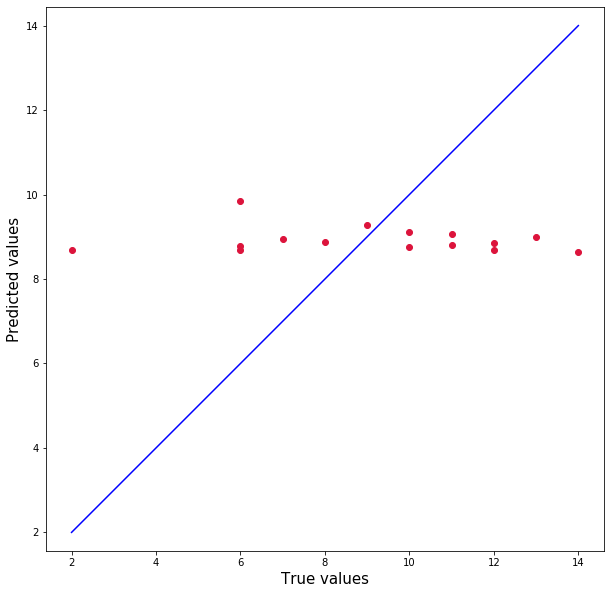

In [314]:
actualvpre(y_test, gb_unseen)

Random Forest

In [315]:
rf_unseen = rf_grid.best_estimator_.predict(X_test)

In [316]:
test_mse = mean_squared_error(y_test, rf_unseen)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, rf_unseen)

print("Mean Squared error: ", mean_squared_error(y_test, rf_unseen))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, rf_unseen)))
print("Mean Absolute error: ", mean_absolute_error(y_test, rf_unseen))

Mean Squared error:  10.362084467832679
Root Mean Squared error:  3.219019177922474
Mean Absolute error:  2.7630789102007367


In [317]:
temp = pd.DataFrame({'Algo': ['Random Forest'],
                            'MSE': [test_mse],
                            'RMSE': [test_rmse],
                            'MAE': [test_mae]})

unseen_result = unseen_result.append(temp, ignore_index=True)

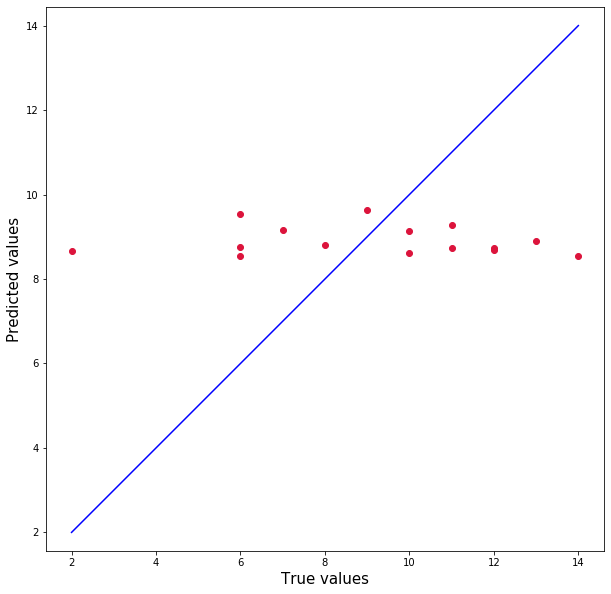

In [318]:
actualvpre(y_test, rf_unseen)

In [319]:
unseen_result

,Algo,MSE,RMSE,MAE
0,XG Boost,11.062137,3.325979,2.818842
1,Gradient Boost,10.379992,3.221799,2.747266
2,Random Forest,10.362084,3.219019,2.763079
